In [2]:
import os
import shutil
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import random
import matplotlib.image as mpimg
from tensorflow import keras

In [3]:
base_dir = os.getcwd()

In [4]:

def create_dataset_directories():
    training_data = os.path.join(base_dir,"train_data")
    validation_data = os.path.join(base_dir,"validation_data")
    if os.path.exists(training_data) and os.path.exists(validation_data):
        shutil.rmtree(training_data)
        shutil.rmtree(validation_data)
        print("deleting existing folders...")
        time.sleep(2)
    dirs = []
    classes = ["celana","dress","heels","jaket","jas","kaos","rok","sandal","sepatu"]
    for item in classes:
        dirs.append(os.path.join(training_data,item))
        dirs.append(os.path.join(validation_data,item))

    for paths in dirs:
        os.makedirs(paths)
    print("Directories created successfully!")
    return dirs

dirs = create_dataset_directories()
print("Paths created:")
for path in dirs:
    print("[-]",path)

Directories created successfully!
Paths created:
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\celana
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\validation_data\celana
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\dress
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\validation_data\dress
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\heels
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\validation_data\heels
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\jaket
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\validation_data\jaket
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\jas
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\validation_data\jas
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-Outfit\detect_user_image2\train_data\kaos
[-] d:\File Dewi\SEMESTER 6 (MBKM)\Go-

In [6]:
def split_dataset(source_dir, training_dir, validation_dir, SPLIT_SIZE):

    all_files = []
    for file_name in os.listdir(source_dir):
        file_path = os.path.join(source_dir,file_name)
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring.'.format(file_name))

    new_files = len(all_files)
    split_point = int(new_files * SPLIT_SIZE)
    print("split_point",split_point)

    train_set = all_files[:split_point]
    validation_set = all_files[split_point:]

    for file_name in train_set:
        shutil.copy(os.path.join(source_dir,file_name),training_dir)
    for file_name in validation_set:
        shutil.copy(os.path.join(source_dir,file_name),validation_dir)

In [7]:
split_dataset("./bahan/celana","./train_data/celana","./validation_data/celana",0.7)
split_dataset("./bahan/dress","./train_data/dress","./validation_data/dress",0.7)
split_dataset("./bahan/heels","./train_data/heels","./validation_data/heels",0.7)
split_dataset("./bahan/jaket","./train_data/jaket","./validation_data/jaket",0.7)
split_dataset("./bahan/jas","./train_data/jas","./validation_data/jas",0.7)
split_dataset("./bahan/kaos","./train_data/kaos","./validation_data/kaos",0.7)
split_dataset("./bahan/rok","./train_data/rok","./validation_data/rok",0.7)
split_dataset("./bahan/sandal","./train_data/sandal","./validation_data/sandal",0.7)
split_dataset("./bahan/sepatu","./train_data/sepatu","./validation_data/sepatu",0.7)

split_point 350
split_point 350
split_point 63
split_point 206
split_point 191
split_point 290
split_point 311
split_point 304
split_point 297


In [8]:
# Show random image from class
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (641, 480, 3)


(641, 480, 3)

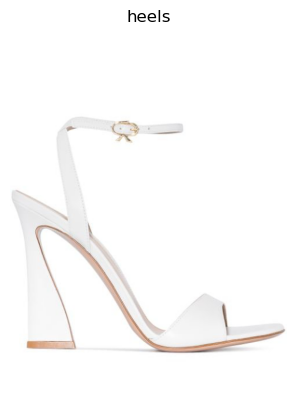

In [101]:
# Show random image with their class
img = view_random_image(target_dir=base_dir + "./bahan/",
                        target_class="heels")
img.shape

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
       train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                              width_shift_range=0.2,
                                                                              height_shift_range=0.2,
                                                                              shear_range=0.2,
                                                                              zoom_range=0.2,
                                                                              fill_mode="nearest",
                                                                              horizontal_flip=True)
       train_generator = train_data_generator.flow_from_directory(directory=TRAINING_DIR,
                                                                  batch_size=32,
                                                                  class_mode="categorical",
                                                                  target_size=(150,150))
       
       validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
       val_generator = validation_data_generator.flow_from_directory(directory=VALIDATION_DIR,
                                                                     batch_size=32,
                                                                     class_mode="categorical",
                                                                     target_size=(150,150))
       
       return train_generator, val_generator

In [11]:
train_gen, val_gen = train_val_generators("./train_data/","./validation_data/")

Found 2362 images belonging to 9 classes.
Found 1016 images belonging to 9 classes.


In [15]:
#model pertama
detect_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation ='relu', input_shape=(150,150,3), weights = None),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(9, activation ='softmax')
])
detect_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [31]:
#Define callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
callbacks = myCallback()

In [17]:
detect_history = detect_model.fit(train_gen,
                    epochs=50,
                    batch_size=32,
                    steps_per_epoch = len(train_gen),
                    validation_data=val_gen,
                    callbacks = [callbacks,early_stop])

Epoch 1/50
74/74 [==============================] - 71s 951ms/step - loss: 1.6994 - accuracy: 0.3311 - val_loss: 1.1647 - val_accuracy: 0.5423
Epoch 2/50
74/74 [==============================] - 50s 672ms/step - loss: 1.2011 - accuracy: 0.5127 - val_loss: 1.0689 - val_accuracy: 0.5679
Epoch 3/50
74/74 [==============================] - 51s 689ms/step - loss: 0.9762 - accuracy: 0.6058 - val_loss: 1.0305 - val_accuracy: 0.6152
Epoch 4/50
74/74 [==============================] - 50s 679ms/step - loss: 0.9238 - accuracy: 0.6279 - val_loss: 0.7427 - val_accuracy: 0.7165
Epoch 5/50
74/74 [==============================] - 51s 687ms/step - loss: 0.8382 - accuracy: 0.6630 - val_loss: 0.7615 - val_accuracy: 0.6919
Epoch 6/50
74/74 [==============================] - 51s 684ms/step - loss: 0.7281 - accuracy: 0.7011 - val_loss: 0.6621 - val_accuracy: 0.7293
Epoch 7/50
74/74 [==============================] - 52s 708ms/step - loss: 0.6764 - accuracy: 0.7303 - val_loss: 0.5589 - val_accuracy: 0.8041

In [7]:
def predict_image(file_path, model):
    img = tf.keras.utils.load_img(file_path, target_size=(150, 150))
    x = tf.keras.utils.img_to_array(img)
    x/=255
    x = np.expand_dims(x, axis = 0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 100)
    print(classes)
    plt.imshow(tf.keras.utils.load_img(file_path,False,color_mode="rgba"))
    plt.show()
    labels = ["celana","dress","heels","jaket","jas","kaos","rok","sandal","sepatu"]
    output_class=labels[np.argmax(classes)]
    print("The predict is {}".format(output_class))

1/1 [==============================] - 0s 29ms/step
[[2.3544808e-05 9.9955326e-01 1.1108990e-06 4.1492640e-06 2.7713688e-05
  6.9514441e-05 3.1804564e-04 1.8942865e-07 2.4879812e-06]]


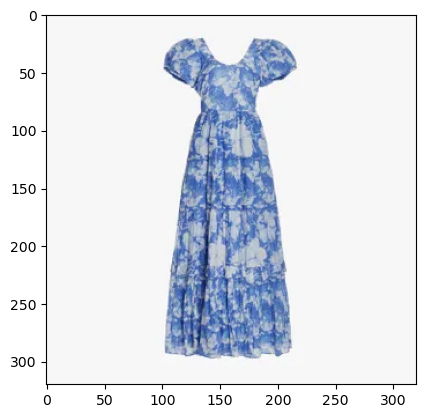

The predict is dress


In [9]:
predict_image("./slide_12.webp",detect_model)

In [113]:
detect_model.save('detect_image_user.model')

INFO:tensorflow:Assets written to: detect_image_user.model\assets


INFO:tensorflow:Assets written to: detect_image_user.model\assets
